In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df_train = pd.read_csv('./df_train_for_fit.csv')
df_test = pd.read_csv('./df_test_for_fit.csv')
df = pd.concat([df_train, df_test], axis=0)

In [3]:
df.columns

Index(['month', 'date', 'week', 'age_log_std', 'duration_log_std',
       'duration_inv', 'campaign_log', 'balance_p_log_std',
       'balance_m_log_std', 'balance_sign', 'pdays', 'pdays_2',
       'pdays_log_std', 'previous_date', 'previous_log', 'total_touch', 'freq',
       'education_num', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'contact_cellular', 'contact_telephone', 'contact_unknown', 'default',
       'housing', 'loan', 'y'],
      dtype='object')

In [4]:
X = df_train.drop(['y'], axis=1).values
y = df_train['y'].values

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

## 性能評価

### random forest

In [6]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)

rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

#### feature importance

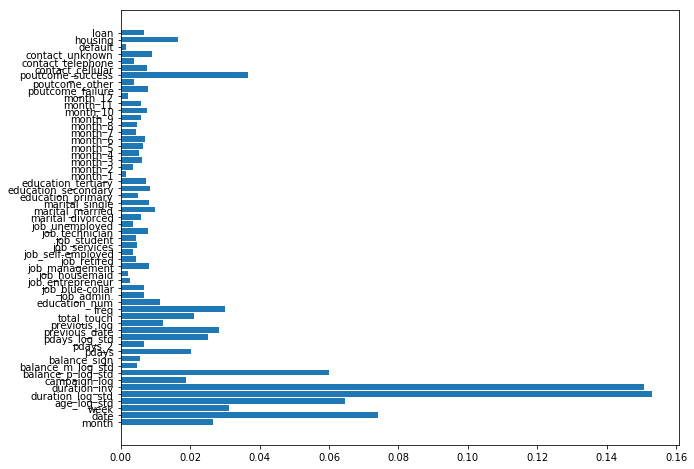

In [7]:
feature_names = df.drop(['y'], axis=1).columns
n_features = len(feature_names)
plt.figure(figsize=(10, 8))
plt.barh(range(n_features), rfc.feature_importances_ , align='center')
plt.yticks(np.arange(n_features), feature_names)
plt.show()

#### スコア

In [8]:
y_train_pred_rfc = rfc.predict_proba(X_train)
y_test_pred_rfc = rfc.predict_proba(X_test)

from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_train, y_train_pred_rfc[:,1]))
print(roc_auc_score(y_test, y_test_pred_rfc[:,1]))

1.0
0.9311220417882821


### 勾配Boosting木

In [9]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()

gbc.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

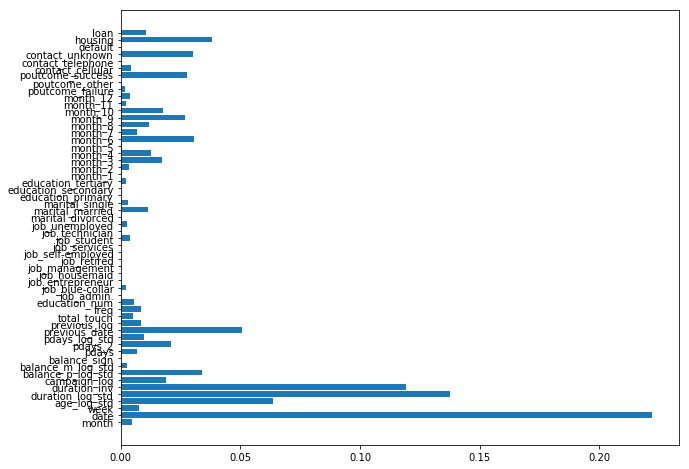

In [10]:
feature_names = df.drop(['y'], axis=1).columns
n_features = len(feature_names)
plt.figure(figsize=(10, 8))
plt.barh(range(n_features), gbc.feature_importances_  , align='center')
plt.yticks(np.arange(n_features), feature_names)
plt.show()

#### スコア

In [11]:
y_train_pred_gbc = gbc.predict_proba(X_train)
y_test_pred_gbc = gbc.predict_proba(X_test)

from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_train, y_train_pred_gbc[:,1]))
print(roc_auc_score(y_test, y_test_pred_gbc[:,1]))

0.9397935516505246
0.9323973694908008


### 勾配Boosting木 + Grid Search

#### スコア

### XGBoost

In [12]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV
#③Xgboostによる学習
# 必要なライブラリのインポート

# 動かすパラメータを明示的に表示
params = {"learning_rate":[0.1,1.0],
         "max_depth": [6,7],
         #"subsample":[0.95,0.98],
         #"colsample_bytree": [0.6,0.7],
         #"min_child_weight":[3,3.5,3.8]
         }

# モデルにインスタンス生成
mod = xgb.XGBClassifier()
# ハイパーパラメータ探索
xgbcv = GridSearchCV(mod, params, cv = 10, scoring= 'roc_auc', n_jobs =-1,verbose=10)

In [13]:

# 予測モデルを作成
xgbcv.fit(X_train, y_train)

Fitting 10 folds for each of 4 candidates, totalling 40 fits
[CV] learning_rate=0.1, max_depth=6 ..................................
[CV] learning_rate=0.1, max_depth=6 ..................................
[CV] learning_rate=0.1, max_depth=6 ..................................
[CV] learning_rate=0.1, max_depth=6 ..................................
[CV]  learning_rate=0.1, max_depth=6, score=0.9304839328332767, total=   8.5s
[CV] learning_rate=0.1, max_depth=6 ..................................
[CV]  learning_rate=0.1, max_depth=6, score=0.9344234785202863, total=   8.6s
[CV] learning_rate=0.1, max_depth=6 ..................................
[CV]  learning_rate=0.1, max_depth=6, score=0.9400077057268534, total=   8.6s
[CV] learning_rate=0.1, max_depth=6 ..................................
[CV]  learning_rate=0.1, max_depth=6, score=0.9362667277531539, total=   8.7s
[CV] learning_rate=0.1, max_depth=6 ..................................
[CV]  learning_rate=0.1, max_depth=6, score=0.9247065122816

[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   17.5s


[CV] learning_rate=0.1, max_depth=7 ..................................
[CV]  learning_rate=0.1, max_depth=6, score=0.9254079378890302, total=   8.5s
[CV] learning_rate=0.1, max_depth=7 ..................................
[CV]  learning_rate=0.1, max_depth=6, score=0.9378113914731276, total=   8.5s
[CV] learning_rate=0.1, max_depth=7 ..................................


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   26.3s


[CV]  learning_rate=0.1, max_depth=7, score=0.933408625980225, total=  10.0s
[CV] learning_rate=0.1, max_depth=7 ..................................
[CV]  learning_rate=0.1, max_depth=7, score=0.9356753963518581, total=  10.0s
[CV] learning_rate=0.1, max_depth=7 ..................................
[CV]  learning_rate=0.1, max_depth=7, score=0.9344714243095806, total=  10.0s
[CV] learning_rate=0.1, max_depth=7 ..................................
[CV]  learning_rate=0.1, max_depth=7, score=0.9394003446172287, total=  10.0s
[CV] learning_rate=0.1, max_depth=7 ..................................
[CV]  learning_rate=0.1, max_depth=7, score=0.9244334381902147, total=  10.0s
[CV] learning_rate=0.1, max_depth=7 ..................................
[CV]  learning_rate=0.1, max_depth=7, score=0.9326711732815742, total=  10.1s
[CV] learning_rate=0.1, max_depth=7 ..................................
[CV]  learning_rate=0.1, max_depth=7, score=0.9388929790509337, total=   9.7s
[CV] learning_rate=1.0, max_d

[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   46.3s


[CV]  learning_rate=0.1, max_depth=7, score=0.9236008299310622, total=   9.6s
[CV] learning_rate=1.0, max_depth=6 ..................................
[CV]  learning_rate=0.1, max_depth=7, score=0.9374044575329631, total=   9.6s
[CV] learning_rate=1.0, max_depth=6 ..................................
[CV]  learning_rate=1.0, max_depth=6, score=0.9051152829867031, total=   8.1s
[CV] learning_rate=1.0, max_depth=6 ..................................
[CV]  learning_rate=1.0, max_depth=6, score=0.9169525656324582, total=   8.1s
[CV] learning_rate=1.0, max_depth=6 ..................................
[CV]  learning_rate=1.0, max_depth=6, score=0.9046731162632118, total=   8.1s
[CV] learning_rate=1.0, max_depth=6 ..................................
[CV]  learning_rate=1.0, max_depth=6, score=0.9112182540107236, total=   8.1s
[CV] learning_rate=1.0, max_depth=6 ..................................


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   56.2s


[CV]  learning_rate=1.0, max_depth=6, score=0.9073341811123753, total=   8.3s
[CV] learning_rate=1.0, max_depth=6 ..................................
[CV]  learning_rate=1.0, max_depth=6, score=0.9007027642058764, total=   8.2s
[CV] learning_rate=1.0, max_depth=6 ..................................
[CV]  learning_rate=1.0, max_depth=6, score=0.9065417308078442, total=   8.2s
[CV] learning_rate=1.0, max_depth=7 ..................................
[CV]  learning_rate=1.0, max_depth=6, score=0.9197938558329428, total=   8.2s
[CV] learning_rate=1.0, max_depth=7 ..................................
[CV]  learning_rate=1.0, max_depth=6, score=0.9000040157954622, total=   8.2s
[CV] learning_rate=1.0, max_depth=7 ..................................
[CV]  learning_rate=1.0, max_depth=6, score=0.9181473796934609, total=   8.2s
[CV] learning_rate=1.0, max_depth=7 ..................................
[CV]  learning_rate=1.0, max_depth=7, score=0.910354692294579, total=   9.5s
[CV] learning_rate=1.0, max_d

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.4min


[CV]  learning_rate=1.0, max_depth=7, score=0.9058135332307075, total=  10.7s
[CV] learning_rate=1.0, max_depth=7 ..................................
[CV]  learning_rate=1.0, max_depth=7, score=0.9087530955090021, total=  10.6s
[CV] learning_rate=1.0, max_depth=7 ..................................
[CV]  learning_rate=1.0, max_depth=7, score=0.9118238404390603, total=  11.1s
[CV]  learning_rate=1.0, max_depth=7, score=0.9136095308212301, total=  11.2s


[Parallel(n_jobs=-1)]: Done  38 out of  40 | elapsed:  1.6min remaining:    4.9s


[CV]  learning_rate=1.0, max_depth=7, score=0.8972491801084265, total=  10.2s
[CV]  learning_rate=1.0, max_depth=7, score=0.9041643798942506, total=  10.2s


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  1.6min finished


GridSearchCV(cv=10, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'learning_rate': [0.1, 1.0], 'max_depth': [6, 7]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=10)

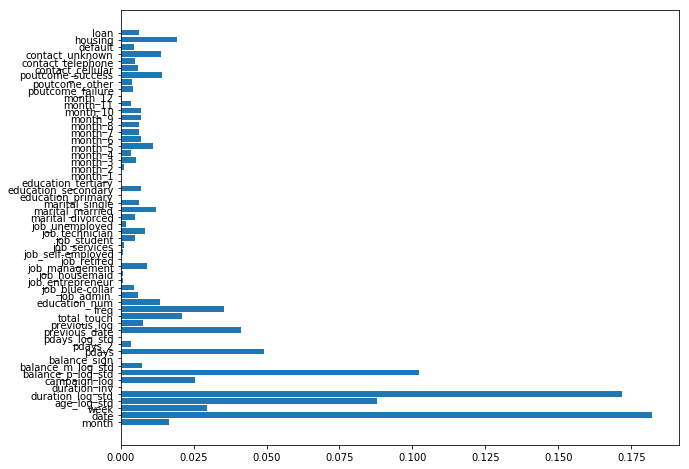

In [29]:
feature_names = df.drop(['y'], axis=1).columns
n_features = len(feature_names)
plt.figure(figsize=(10, 8))
plt.barh(range(n_features), xgbcv.best_estimator_.feature_importances_  , align='center')
plt.yticks(np.arange(n_features), feature_names)
plt.show()

#### スコア

In [14]:
y_train_pred_xgb = xgbcv.best_estimator_.predict_proba(X_train)
y_test_pred_xgb = xgbcv.best_estimator_.predict_proba(X_test)

from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_train, y_train_pred_xgb[:,1]))
print(roc_auc_score(y_test, y_test_pred_xgb[:,1]))

0.9721608346826
0.9364707546552709


In [33]:
import lightgbm as lgb
params2 = {
        'max_depth': [4,5,6,7,8,9],
        'learning_rate': [0.08,0.09,0.1,0.11,0.12,0.13]
}


# モデルにインスタンス生成
gbm = lgb.LGBMClassifier()
# ハイパーパラメータ探索
gbm_cv = GridSearchCV(gbm, params2, scoring= 'roc_auc', n_jobs =-1,verbose=10)

# 予測モデルを作成
gbm_cv.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] learning_rate=0.08, max_depth=4 .................................
[CV] learning_rate=0.08, max_depth=4 .................................
[CV] learning_rate=0.08, max_depth=4 .................................
[CV] learning_rate=0.08, max_depth=5 .................................
[CV]  learning_rate=0.08, max_depth=4, score=0.9297669930016077, total=   1.5s
[CV] learning_rate=0.08, max_depth=5 .................................
[CV]  learning_rate=0.08, max_depth=4, score=0.9267755944403364, total=   1.7s
[CV] learning_rate=0.08, max_depth=5 .................................
[CV]  learning_rate=0.08, max_depth=4, score=0.9290993973550918, total=   1.9s
[CV] learning_rate=0.08, max_depth=6 .................................
[CV]  learning_rate=0.08, max_depth=5, score=0.9319178287959721, total=   2.7s
[CV] learning_rate=0.08, max_depth=6 .................................
[CV]  learning_rate=0.08, max_depth=5, score=0.9314481

[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    4.2s


[CV] learning_rate=0.08, max_depth=7 .................................
[CV]  learning_rate=0.08, max_depth=6, score=0.9300472862953861, total=   3.3s
[CV] learning_rate=0.08, max_depth=7 .................................
[CV]  learning_rate=0.08, max_depth=6, score=0.9322425419470356, total=   3.6s
[CV] learning_rate=0.08, max_depth=7 .................................
[CV]  learning_rate=0.08, max_depth=7, score=0.9301086923867262, total=   3.5s
[CV] learning_rate=0.08, max_depth=8 .................................
[CV]  learning_rate=0.08, max_depth=6, score=0.9282647040700004, total=   4.1s
[CV] learning_rate=0.08, max_depth=8 .................................


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    8.4s


[CV]  learning_rate=0.08, max_depth=7, score=0.9328427479519835, total=   4.1s
[CV] learning_rate=0.08, max_depth=8 .................................
[CV]  learning_rate=0.08, max_depth=7, score=0.9302087425285762, total=   3.9s
[CV] learning_rate=0.08, max_depth=9 .................................
[CV]  learning_rate=0.08, max_depth=8, score=0.9302090330643563, total=   3.7s
[CV] learning_rate=0.08, max_depth=9 .................................
[CV]  learning_rate=0.08, max_depth=8, score=0.932897738758772, total=   4.1s
[CV] learning_rate=0.08, max_depth=9 .................................
[CV]  learning_rate=0.08, max_depth=8, score=0.9310284568814123, total=   3.2s
[CV] learning_rate=0.09, max_depth=4 .................................
[CV]  learning_rate=0.08, max_depth=9, score=0.9315423023078357, total=   3.9s
[CV] learning_rate=0.09, max_depth=4 .................................
[CV]  learning_rate=0.09, max_depth=4, score=0.9291707774299568, total=   1.8s
[CV] learning_rate=0.0

[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   14.9s


[CV]  learning_rate=0.08, max_depth=9, score=0.9326603276826368, total=   3.9s
[CV] learning_rate=0.09, max_depth=5 .................................
[CV]  learning_rate=0.08, max_depth=9, score=0.9300394079089257, total=   3.8s
[CV] learning_rate=0.09, max_depth=5 .................................
[CV]  learning_rate=0.09, max_depth=4, score=0.9316067182641677, total=   1.9s
[CV] learning_rate=0.09, max_depth=5 .................................
[CV]  learning_rate=0.09, max_depth=4, score=0.9273584569584374, total=   1.9s
[CV] learning_rate=0.09, max_depth=6 .................................
[CV]  learning_rate=0.09, max_depth=5, score=0.9300691569580553, total=   2.7s
[CV] learning_rate=0.09, max_depth=6 .................................
[CV]  learning_rate=0.09, max_depth=5, score=0.9291870782881968, total=   2.3s
[CV] learning_rate=0.09, max_depth=6 .................................
[CV]  learning_rate=0.09, max_depth=5, score=0.9328743947401352, total=   2.8s
[CV] learning_rate=0.

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   19.4s


[CV]  learning_rate=0.09, max_depth=6, score=0.929634147074198, total=   3.0s
[CV] learning_rate=0.09, max_depth=7 .................................
[CV]  learning_rate=0.09, max_depth=6, score=0.9334028840692715, total=   2.7s
[CV] learning_rate=0.09, max_depth=7 .................................
[CV]  learning_rate=0.09, max_depth=6, score=0.9281470002618848, total=   2.8s
[CV] learning_rate=0.09, max_depth=8 .................................
[CV]  learning_rate=0.09, max_depth=7, score=0.929047484573372, total=   3.3s
[CV] learning_rate=0.09, max_depth=8 .................................
[CV]  learning_rate=0.09, max_depth=7, score=0.9328716271502969, total=   3.0s
[CV] learning_rate=0.09, max_depth=8 .................................
[CV]  learning_rate=0.09, max_depth=7, score=0.9300172632251901, total=   3.2s
[CV] learning_rate=0.09, max_depth=9 .................................
[CV]  learning_rate=0.09, max_depth=8, score=0.9296780085680124, total=   3.2s
[CV] learning_rate=0.09

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   26.6s


[CV]  learning_rate=0.1, max_depth=4, score=0.9301785102714005, total=   1.4s
[CV] learning_rate=0.1, max_depth=4 ..................................
[CV]  learning_rate=0.09, max_depth=9, score=0.9329010472682701, total=   3.6s
[CV] learning_rate=0.1, max_depth=4 ..................................
[CV]  learning_rate=0.09, max_depth=9, score=0.9324874134827349, total=   3.6s
[CV] learning_rate=0.1, max_depth=5 ..................................
[CV]  learning_rate=0.1, max_depth=4, score=0.9321685390013573, total=   1.8s
[CV] learning_rate=0.1, max_depth=5 ..................................
[CV]  learning_rate=0.09, max_depth=9, score=0.9307131358412669, total=   4.1s
[CV] learning_rate=0.1, max_depth=5 ..................................
[CV]  learning_rate=0.1, max_depth=4, score=0.9272526679529839, total=   2.1s
[CV] learning_rate=0.1, max_depth=6 ..................................
[CV]  learning_rate=0.1, max_depth=5, score=0.9310893873210241, total=   3.0s
[CV] learning_rate=0.1, m

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   33.2s


[CV]  learning_rate=0.1, max_depth=6, score=0.9300864612186287, total=   3.1s
[CV] learning_rate=0.1, max_depth=7 ..................................
[CV]  learning_rate=0.1, max_depth=6, score=0.9327877571451949, total=   2.9s
[CV] learning_rate=0.1, max_depth=7 ..................................
[CV]  learning_rate=0.1, max_depth=6, score=0.9286859344671412, total=   2.7s
[CV] learning_rate=0.1, max_depth=8 ..................................
[CV]  learning_rate=0.1, max_depth=7, score=0.9318096771673887, total=   3.6s
[CV] learning_rate=0.1, max_depth=8 ..................................
[CV]  learning_rate=0.1, max_depth=7, score=0.9331177019859261, total=   3.3s
[CV] learning_rate=0.1, max_depth=8 ..................................
[CV]  learning_rate=0.1, max_depth=7, score=0.9309490248636658, total=   3.4s
[CV] learning_rate=0.1, max_depth=9 ..................................
[CV]  learning_rate=0.1, max_depth=8, score=0.9311230344943612, total=   3.9s
[CV] learning_rate=0.1, max_

[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   42.7s


[CV]  learning_rate=0.1, max_depth=9, score=0.9327664587364389, total=   4.0s
[CV] learning_rate=0.11, max_depth=5 .................................
[CV]  learning_rate=0.11, max_depth=4, score=0.9314351276941885, total=   1.4s
[CV] learning_rate=0.11, max_depth=5 .................................
[CV]  learning_rate=0.11, max_depth=4, score=0.9267948506870629, total=   1.5s
[CV] learning_rate=0.11, max_depth=5 .................................
[CV]  learning_rate=0.1, max_depth=9, score=0.9296728171118711, total=   4.1s
[CV] learning_rate=0.11, max_depth=6 .................................
[CV]  learning_rate=0.11, max_depth=5, score=0.9326072621557359, total=   2.6s
[CV] learning_rate=0.11, max_depth=6 .................................
[CV]  learning_rate=0.11, max_depth=5, score=0.9321474707539971, total=   2.8s
[CV] learning_rate=0.11, max_depth=6 .................................
[CV]  learning_rate=0.11, max_depth=5, score=0.9280876669516591, total=   3.2s
[CV] learning_rate=0.11

[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   50.8s


[CV]  learning_rate=0.11, max_depth=7, score=0.9302827273514888, total=   3.4s
[CV] learning_rate=0.11, max_depth=8 .................................
[CV]  learning_rate=0.11, max_depth=7, score=0.9295837569707613, total=   2.8s
[CV] learning_rate=0.11, max_depth=9 .................................
[CV]  learning_rate=0.11, max_depth=8, score=0.9305911688186839, total=   2.8s
[CV] learning_rate=0.11, max_depth=9 .................................
[CV]  learning_rate=0.11, max_depth=8, score=0.9325425246195166, total=   3.1s
[CV] learning_rate=0.11, max_depth=9 .................................
[CV]  learning_rate=0.11, max_depth=8, score=0.9301987533505869, total=   2.9s
[CV] learning_rate=0.12, max_depth=4 .................................
[CV]  learning_rate=0.11, max_depth=9, score=0.9302175650261667, total=   3.3s
[CV] learning_rate=0.12, max_depth=4 .................................
[CV]  learning_rate=0.12, max_depth=4, score=0.9317971796458636, total=   1.5s
[CV] learning_rate=0.

[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   59.9s


[CV]  learning_rate=0.12, max_depth=5, score=0.9284495640385741, total=   2.5s
[CV] learning_rate=0.12, max_depth=7 .................................
[CV]  learning_rate=0.12, max_depth=6, score=0.9291904850600542, total=   3.5s
[CV] learning_rate=0.12, max_depth=7 .................................
[CV]  learning_rate=0.12, max_depth=6, score=0.9313773692975615, total=   3.0s
[CV] learning_rate=0.12, max_depth=7 .................................
[CV]  learning_rate=0.12, max_depth=6, score=0.9276588544073697, total=   3.1s
[CV] learning_rate=0.12, max_depth=8 .................................
[CV]  learning_rate=0.12, max_depth=7, score=0.9298748445320338, total=   3.1s
[CV] learning_rate=0.12, max_depth=8 .................................
[CV]  learning_rate=0.12, max_depth=7, score=0.931719587797576, total=   3.2s
[CV] learning_rate=0.12, max_depth=8 .................................
[CV]  learning_rate=0.12, max_depth=7, score=0.9295931443910406, total=   3.6s
[CV] learning_rate=0.1

[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  1.2min


[CV]  learning_rate=0.13, max_depth=4, score=0.9290385644853191, total=   1.3s
[CV]  learning_rate=0.13, max_depth=4, score=0.9329231283872893, total=   1.5s
[CV] learning_rate=0.13, max_depth=5 .................................
[CV] learning_rate=0.13, max_depth=6 .................................
[CV]  learning_rate=0.13, max_depth=5, score=0.9293277174598787, total=   2.1s
[CV] learning_rate=0.13, max_depth=6 .................................
[CV]  learning_rate=0.13, max_depth=5, score=0.9333734032209933, total=   2.3s
[CV] learning_rate=0.13, max_depth=6 .................................
[CV]  learning_rate=0.13, max_depth=5, score=0.9285607688634193, total=   2.1s
[CV] learning_rate=0.13, max_depth=7 .................................
[CV]  learning_rate=0.13, max_depth=6, score=0.929745663420115, total=   2.7s
[CV] learning_rate=0.13, max_depth=7 .................................
[CV]  learning_rate=0.13, max_depth=6, score=0.9286028919031334, total=   2.6s
[CV] learning_rate=0.1

[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:  1.4min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        learning_rate=0.1, max_depth=-1, min_child_samples=20,
        min_child_weight=0.001, min_split_gain=0.0, n_estimators=100,
        n_jobs=-1, num_leaves=31, objective=None, random_state=None,
        reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
        subsample_for_bin=200000, subsample_freq=0),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [4, 5, 6, 7, 8, 9], 'learning_rate': [0.08, 0.09, 0.1, 0.11, 0.12, 0.13]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=10)

#### スコア

In [34]:
y_train_pred_gbm = gbm_cv.best_estimator_.predict_proba(X_train)
y_test_pred_gbm = gbm_cv.best_estimator_.predict_proba(X_test)

from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_train, y_train_pred_gbm[:,1]))
print(roc_auc_score(y_test, y_test_pred_gbm[:,1]))

0.9731445113855078
0.9362852953992372


### アンサンブリング

In [15]:
print(roc_auc_score(y_train, y_train_pred_rfc[:,1]))
print(roc_auc_score(y_test, y_test_pred_rfc[:,1]))

1.0
0.9311220417882821


In [16]:
print(roc_auc_score(y_train, y_train_pred_gbc[:,1]))
print(roc_auc_score(y_test, y_test_pred_gbc[:,1]))

0.9397935516505246
0.9323973694908008


In [17]:
print(roc_auc_score(y_train, y_train_pred_xgb[:,1]))
print(roc_auc_score(y_test, y_test_pred_xgb[:,1]))

0.9721608346826
0.9364707546552709


In [35]:
print(roc_auc_score(y_train, y_train_pred_gbm[:,1]))
print(roc_auc_score(y_test, y_test_pred_gbm[:,1]))

0.9731445113855078
0.9362852953992372


In [38]:
pred1 = y_test_pred_rfc[:,1]
pred2 = y_test_pred_gbc[:,1]
pred3 = y_test_pred_xgb[:,1]
pred4 = y_test_pred_gbm[:,1]

y_mean = np.average(np.array([pred1,pred3,pred4]),axis=0,weights=[0.2,0.4,0.4])

roc_auc_score(y_test, y_mean)

0.9386038314169456

## 提出

In [20]:
# testデータのX
X_sub = df_test.drop(['y'], axis=1).values

#### 全データで再学習

In [21]:
rfc.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [23]:
gbc.fit(X,y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [24]:
xgbcv.fit(X, y)

Fitting 10 folds for each of 4 candidates, totalling 40 fits
[CV] learning_rate=0.1, max_depth=6 ..................................
[CV] learning_rate=0.1, max_depth=6 ..................................
[CV] learning_rate=0.1, max_depth=6 ..................................
[CV] learning_rate=0.1, max_depth=6 ..................................
[CV]  learning_rate=0.1, max_depth=6, score=0.9372776092750882, total=  12.2s
[CV]  learning_rate=0.1, max_depth=6, score=0.9329775081734746, total=  12.2s
[CV] learning_rate=0.1, max_depth=6 ..................................
[CV] learning_rate=0.1, max_depth=6 ..................................
[CV]  learning_rate=0.1, max_depth=6, score=0.9415509076973152, total=  12.3s
[CV] learning_rate=0.1, max_depth=6 ..................................
[CV]  learning_rate=0.1, max_depth=6, score=0.9308005409592837, total=  12.3s
[CV] learning_rate=0.1, max_depth=6 ..................................
[CV]  learning_rate=0.1, max_depth=6, score=0.9302055412498

[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   24.6s


[CV]  learning_rate=0.1, max_depth=6, score=0.933764480417273, total=  12.1s
[CV] learning_rate=0.1, max_depth=7 ..................................
[CV]  learning_rate=0.1, max_depth=6, score=0.9296115066219715, total=  12.2s
[CV] learning_rate=0.1, max_depth=7 ..................................


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   37.1s


[CV]  learning_rate=0.1, max_depth=7, score=0.9404405665627198, total=  14.3s
[CV] learning_rate=0.1, max_depth=7 ..................................
[CV]  learning_rate=0.1, max_depth=7, score=0.9315515815180997, total=  14.4s
[CV] learning_rate=0.1, max_depth=7 ..................................
[CV]  learning_rate=0.1, max_depth=7, score=0.9304801670146138, total=  15.5s
[CV] learning_rate=0.1, max_depth=7 ..................................
[CV]  learning_rate=0.1, max_depth=7, score=0.9363164874410788, total=  15.5s
[CV] learning_rate=0.1, max_depth=7 ..................................
[CV]  learning_rate=0.1, max_depth=7, score=0.9302015897999908, total=  15.6s
[CV] learning_rate=0.1, max_depth=7 ..................................
[CV]  learning_rate=0.1, max_depth=7, score=0.9375987039244484, total=  15.6s
[CV] learning_rate=0.1, max_depth=7 ..................................
[CV]  learning_rate=0.1, max_depth=7, score=0.9402185151768603, total=  14.5s
[CV]  learning_rate=0.1, max

[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  1.1min


[CV]  learning_rate=0.1, max_depth=7, score=0.9288449253505265, total=  14.4s
[CV] learning_rate=1.0, max_depth=6 ..................................
[CV]  learning_rate=0.1, max_depth=7, score=0.9342057256508367, total=  14.3s
[CV] learning_rate=1.0, max_depth=6 ..................................
[CV]  learning_rate=1.0, max_depth=6, score=0.9116176331621885, total=  12.4s
[CV] learning_rate=1.0, max_depth=6 ..................................
[CV]  learning_rate=1.0, max_depth=6, score=0.905143052218327, total=  12.5s
[CV] learning_rate=1.0, max_depth=6 ..................................
[CV]  learning_rate=1.0, max_depth=6, score=0.9038444873360381, total=  13.0s
[CV] learning_rate=1.0, max_depth=6 ..................................
[CV]  learning_rate=1.0, max_depth=6, score=0.9133834902377858, total=  13.0s
[CV] learning_rate=1.0, max_depth=6 ..................................


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.4min


[CV]  learning_rate=1.0, max_depth=6, score=0.9129679998419419, total=  14.0s
[CV] learning_rate=1.0, max_depth=6 ..................................
[CV]  learning_rate=1.0, max_depth=6, score=0.9109817377159304, total=  13.9s
[CV] learning_rate=1.0, max_depth=6 ..................................
[CV]  learning_rate=1.0, max_depth=6, score=0.9226714435304887, total=  13.6s
[CV] learning_rate=1.0, max_depth=7 ..................................
[CV]  learning_rate=1.0, max_depth=6, score=0.9163214636170254, total=  13.5s
[CV] learning_rate=1.0, max_depth=7 ..................................
[CV]  learning_rate=1.0, max_depth=6, score=0.9083237291149411, total=  12.7s
[CV]  learning_rate=1.0, max_depth=6, score=0.9101664218963008, total=  12.6s
[CV] learning_rate=1.0, max_depth=7 ..................................
[CV] learning_rate=1.0, max_depth=7 ..................................
[CV]  learning_rate=1.0, max_depth=7, score=0.9182993668693105, total=  14.8s
[CV] learning_rate=1.0, max_

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.1min


[CV]  learning_rate=1.0, max_depth=7, score=0.9158077751361604, total=  15.5s
[CV] learning_rate=1.0, max_depth=7 ..................................
[CV]  learning_rate=1.0, max_depth=7, score=0.9165256218594205, total=  15.5s
[CV] learning_rate=1.0, max_depth=7 ..................................
[CV]  learning_rate=1.0, max_depth=7, score=0.9131115691865941, total=  15.2s
[CV]  learning_rate=1.0, max_depth=7, score=0.9240294251299039, total=  15.4s


[Parallel(n_jobs=-1)]: Done  38 out of  40 | elapsed:  2.3min remaining:    7.3s


[CV]  learning_rate=1.0, max_depth=7, score=0.9046212206028595, total=  13.6s
[CV]  learning_rate=1.0, max_depth=7, score=0.914599948631152, total=  13.4s


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  2.4min finished


GridSearchCV(cv=10, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'learning_rate': [0.1, 1.0], 'max_depth': [6, 7]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=10)

In [27]:
# rfc の予測値
predictor = rfc
y_sub_pred_rfc = predictor.predict_proba(X_sub)
y_sub_pred_rfc = y_sub_pred_rfc[:,1]

# gbc + gridsearch の予測値
#predictor = gs.best_estimator_
#y_sub_pred_gs = predictor.predict_proba(X_sub)
#y_sub_pred_gs = y_sub_pred_gs[:,1]

# gbcの予測値
predictor = gbc
y_sub_pred_gbc = predictor.predict_proba(X_sub)
y_sub_pred_gbc = y_sub_pred_gbc[:,1]

# XGBoost
predictor = xgbcv.best_estimator_
y_sub_pred_xgb = predictor.predict_proba(X_sub)
y_sub_pred_xgb = y_sub_pred_xgb[:,1]

# アンサンブル
pred1 = y_sub_pred_rfc
pred2 = y_sub_pred_gbc
pred3 = y_sub_pred_xgb

y_sub_pred = np.average(np.array([pred1,pred2,pred3]),axis=0,weights=[0.25,0.25,0.5])

# 提出用scv
submission = pd.Series(y_sub_pred, index=np.arange(1, len(y_sub_pred)+1))
submission.to_csv('../output/submission.csv')